In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import pickle

df = pd.read_csv('~/SoldatovMD/data/adult.csv')
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [3]:
df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df['workclass'] = df['workclass'].astype('category')
df['education'] = df['education'].astype('category')
df['marital.status'] = df['marital.status'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['race'] = df['race'].astype('category')
df['sex'] = df['sex'].astype('category')
df['native.country'] = df['native.country'].astype('category')
df['income'] = df['income'].astype('category')


In [6]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
cat_features = df.select_dtypes(include=['category']).columns.to_list()
cat_features

num_features = df.select_dtypes(include=['number']).columns.to_list()
num_features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [9]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB


In [46]:
for cat in cat_features:
    print(f'{cat} - numer of unique = {df[cat].nunique()}')

workclass - numer of unique = 9
education - numer of unique = 16
marital.status - numer of unique = 7
occupation - numer of unique = 15
relationship - numer of unique = 6
race - numer of unique = 5
sex - numer of unique = 2
native.country - numer of unique = 42
income - numer of unique = 2


In [11]:
for col in cat_features:
    print(f'Unique categories in {col}: {df[col].value_counts()}')

Unique categories in workclass: workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
Unique categories in education: education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
Unique categories in marital.status: marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: cou

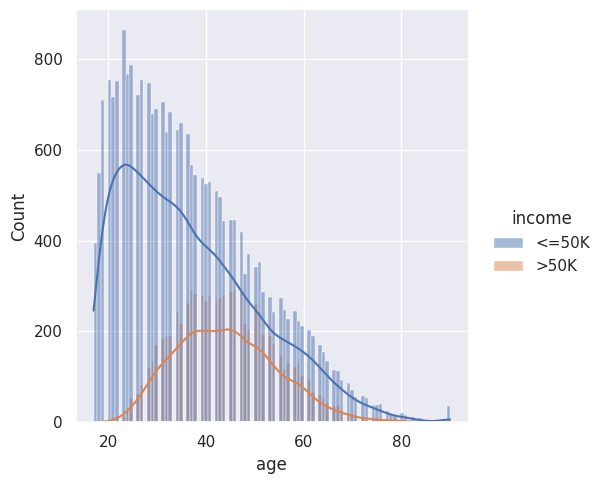

In [31]:

sns.displot(df, x='age', bins=100, hue='income', kde=True)

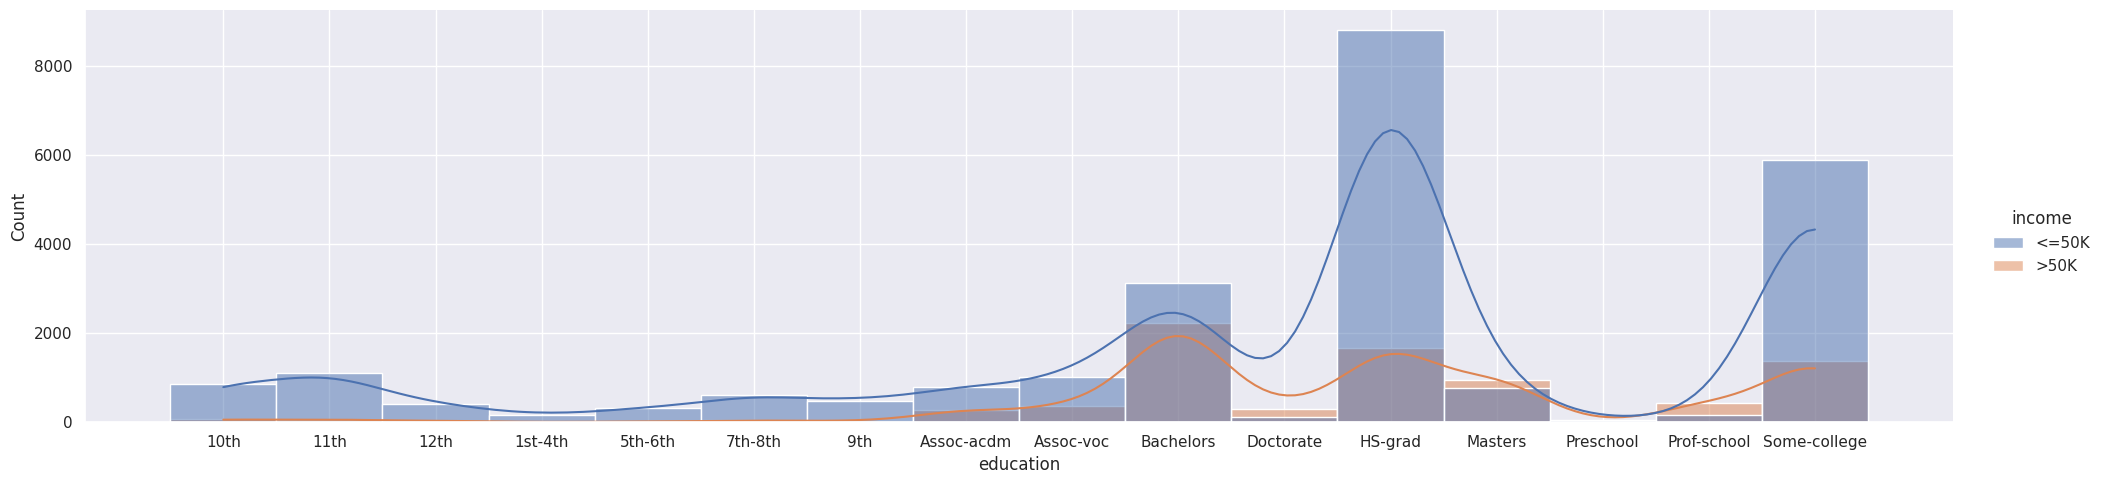

In [32]:

sns.set_theme(rc={'figure.figsize':(110,80)})
sns.displot(df, x='education', bins=100, hue='income', kde=True, aspect=4)

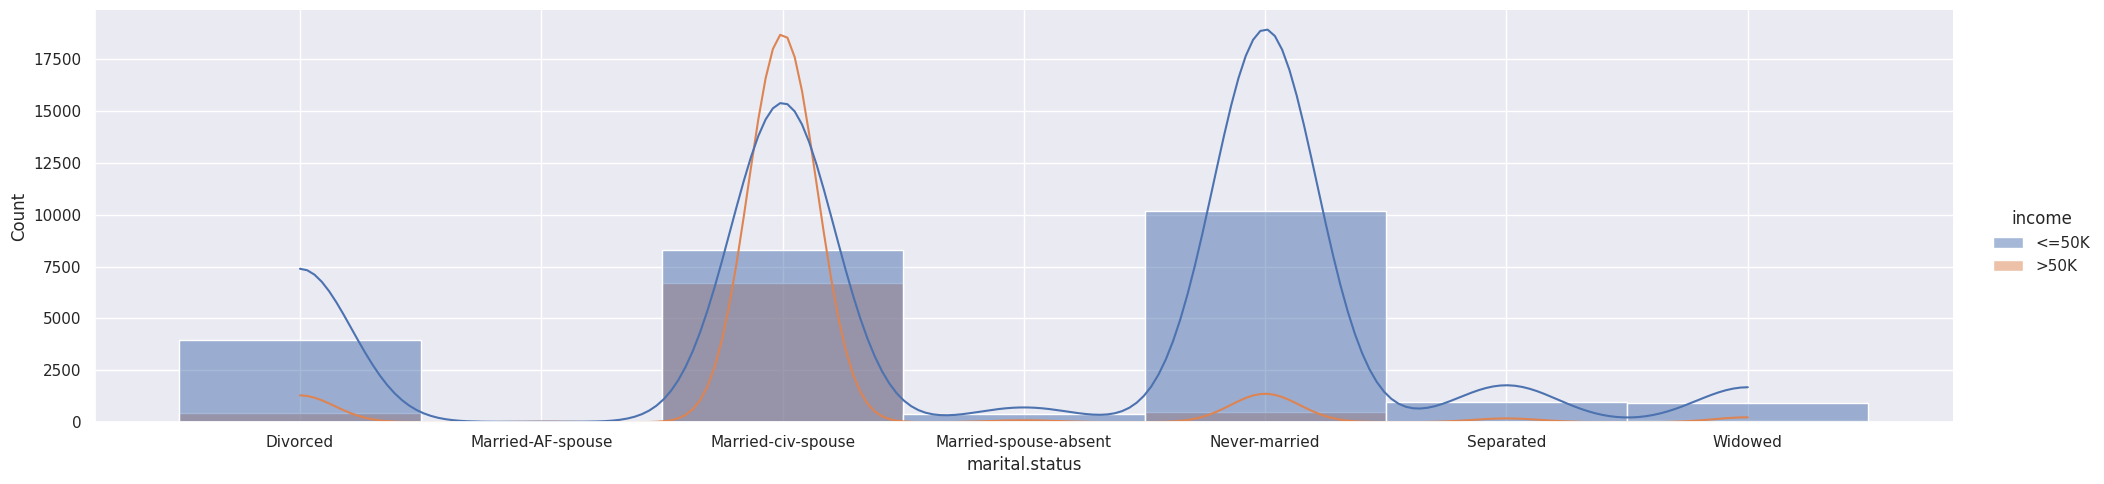

In [33]:
sns.displot(df, x='marital.status', bins=100, hue='income', kde=True, aspect=4)

<Axes: >

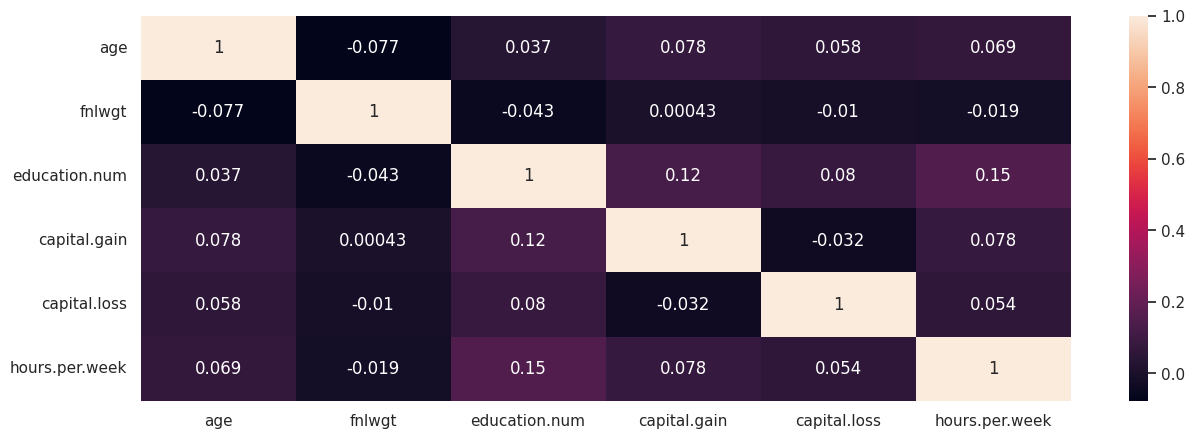

In [48]:
import matplotlib.pyplot as plt
feature_correlation = df[num_features].corr()
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(feature_correlation, annot=True)

In [56]:
def flat_index(df_stats): 
    df_stats.columns = df_stats.columns.get_level_values(0) + '_' +  df_stats.columns.get_level_values(1) 
    df_stats.columns = df_stats.columns.to_flat_index() 
    df_stats.reset_index(inplace=True) 
    return df_stats
aggregated_df = df[num_features].groupby(by='age').agg(['mean', 'std'])
aggregated_df = flat_index(aggregated_df)
aggregated_df 

,age,fnlwgt_mean,fnlwgt_std,education.num_mean,education.num_std,capital.gain_mean,capital.gain_std,capital.loss_mean,capital.loss_std,hours.per.week_mean,hours.per.week_std
0,17,185722.232911,105974.139070,6.648101,0.912527,109.691139,1722.554867,41.751899,259.555730,21.367089,10.021015
1,18,193530.207273,112996.915840,8.152727,1.484081,102.058182,1478.176635,44.336364,265.140265,25.912727,11.733362
2,19,204803.543539,116424.673450,9.096910,1.368889,92.092697,1412.892408,43.915730,274.190087,30.678371,12.119154
3,20,198537.705179,107076.238926,9.345286,1.334000,82.786189,1282.429902,33.298805,243.987993,32.280212,11.726599
4,21,200116.997222,106200.604029,9.434722,1.472479,204.625000,3751.053585,51.636111,301.855575,34.034722,12.040389
...,...,...,...,...,...,...,...,...,...,...,...
68,85,126667.333333,35100.616410,10.333333,2.309401,0.000000,0.000000,0.000000,0.000000,29.333333,24.006943
69,86,149912.000000,NaN,14.000000,NaN,0.000000,NaN,0.000000,NaN,40.000000,NaN
70,87,90338.000000,NaN,9.000000,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN
71,88,153975.666667,74610.122754,13.333333,2.886751,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000


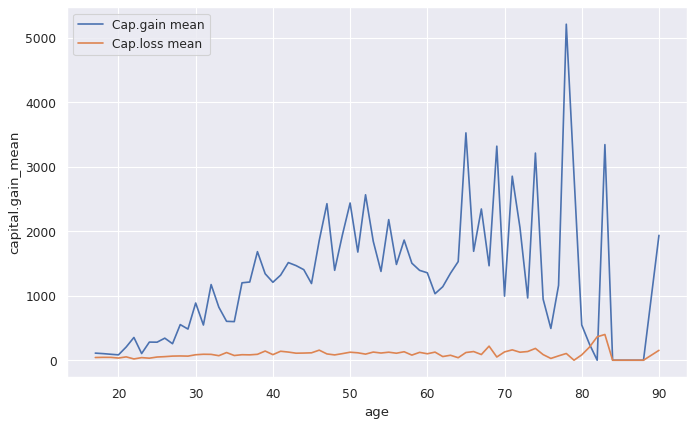

In [69]:
plt.figure(figsize=(10, 6), dpi=80)
sns.lineplot(aggregated_df,x='age',y='capital.gain_mean', label='Cap.gain mean')
sns.lineplot(aggregated_df,x='age',y='capital.loss_mean', label='Cap.loss mean')
plt.show()

<Axes: xlabel='age', ylabel='capital.loss_mean'>

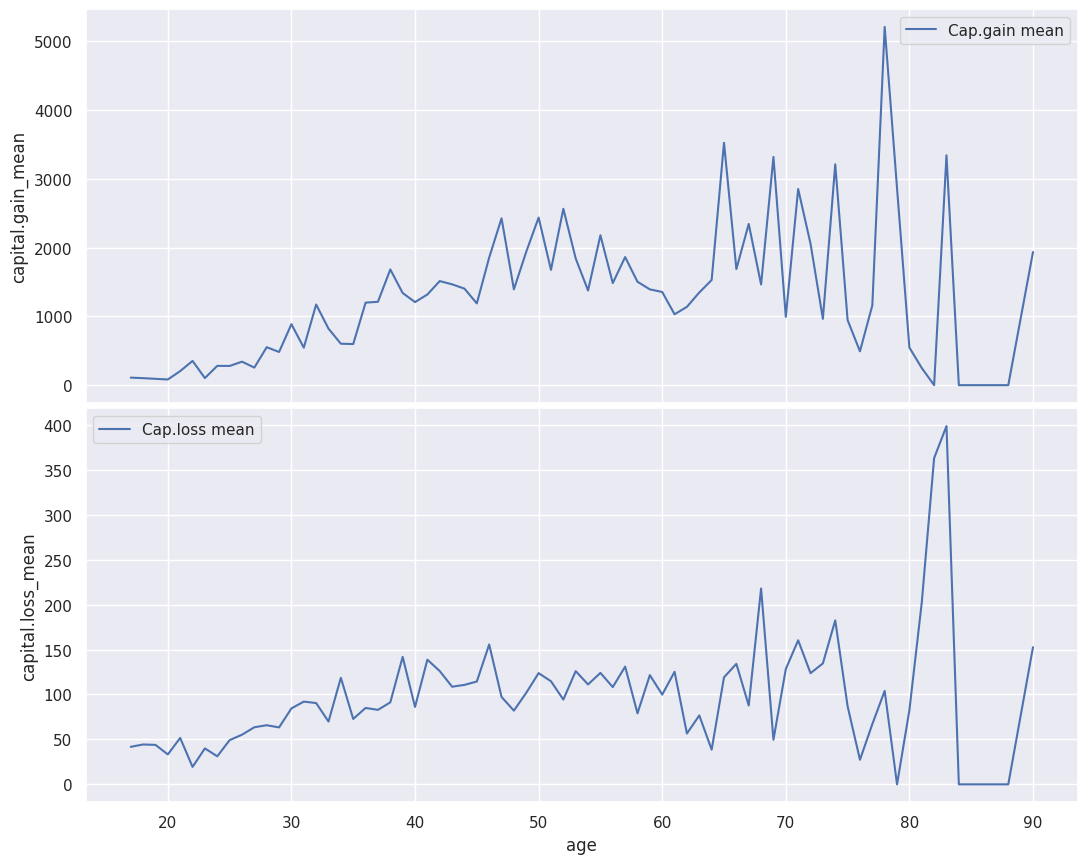

In [80]:
fig, axs = plt.subplots(2,1)
fig.tight_layout(pad=1)
fig.set_size_inches(10, 8, forward=True)

sns.lineplot(aggregated_df,x='age',y='capital.gain_mean', label='Cap.gain mean', ax=axs[0])

sns.lineplot(aggregated_df,x='age',y='capital.loss_mean', label='Cap.loss mean', ax=axs[1])


In [81]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource,  HoverTool, Legend
from bokeh.io import output_notebook 
output_notebook()

Loading BokehJS ...

In [90]:
source = ColumnDataSource(data=df.sample(frac=0.3))
p = figure(width=1000)
p.scatter(source=source, x='education.num', y='capital.gain' )
hover = HoverTool(tooltips=[('Sex', '@sex'),
                              ('age', '@age'),
                                ('race', '@race')])

p.add_tools(hover)
show(p)

In [91]:
df.to_pickle('../data/clean_data.pkl')


In [93]:
df = pd.read_pickle('../data/clean_data.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   fnlwgt          32561 non-null  int64   
 3   education       32561 non-null  category
 4   education.num   32561 non-null  int64   
 5   marital.status  32561 non-null  category
 6   occupation      32561 non-null  category
 7   relationship    32561 non-null  category
 8   race            32561 non-null  category
 9   sex             32561 non-null  category
 10  capital.gain    32561 non-null  int64   
 11  capital.loss    32561 non-null  int64   
 12  hours.per.week  32561 non-null  int64   
 13  native.country  32561 non-null  category
 14  income          32561 non-null  category
dtypes: category(9), int64(6)
memory usage: 1.8 MB
